In [1]:
import cdflib
import pandas as pd

cdf = cdflib.CDF('AL1_ASW91_L2_TH2_20250619_UNP_9999_999999_V02.cdf')

# Extract variables
epoch = cdflib.cdfepoch.to_datetime(cdf.varget('epoch_for_cdf_mod'))
energy = cdf.varget('energy_center_mod')
flux = cdf.varget('integrated_flux_mod')
xpos = cdf.varget('spacecraft_xpos')
ypos = cdf.varget('spacecraft_ypos')
zpos = cdf.varget('spacecraft_zpos')

# Assemble into a DataFrame using the first energy and flux channel
df = pd.DataFrame({
    'epoch': epoch,
    'energy': energy[:, 0],  # Use the first column
    'flux': flux[:, 0],      # Use the first column
    'x': xpos,
    'y': ypos,
    'z': zpos
})


FileNotFoundError: C:\Users\harsh\Downloads\ISRO\Notebook\fits_test\AL1_ASW91_L2_TH2_20250619_UNP_9999_999999_V02.cdf not found

In [ ]:
df

,epoch,energy,flux,x,y,z
0,2025-06-19 00:00:30.661,172.501303,1.064583e+06,1.271661e+06,-104038.863589,-105425.306541
1,2025-06-19 00:00:35.661,172.501303,NaN,1.271661e+06,-104037.415942,-105425.341151
2,2025-06-19 00:00:40.662,172.501303,6.395833e+05,1.271661e+06,-104035.968264,-105425.375762
3,2025-06-19 00:00:45.661,172.501303,NaN,1.271661e+06,-104034.520672,-105425.410370
4,2025-06-19 00:00:50.662,172.501303,5.302083e+05,1.271661e+06,-104033.073021,-105425.444978
...,...,...,...,...,...,...
17269,2025-06-19 23:59:36.452,172.501303,4.270833e+04,1.272474e+06,-78855.236211,-105934.506126
17270,2025-06-19 23:59:41.452,172.501303,NaN,1.272474e+06,-78853.767586,-105934.530524
17271,2025-06-19 23:59:46.452,172.501303,NaN,1.272474e+06,-78852.299018,-105934.554921
17272,2025-06-19 23:59:51.452,172.501303,1.583333e+05,1.272474e+06,-78850.830449,-105934.579317


In [14]:
import cdflib
import pandas as pd

cdf = cdflib.CDF('c:/Users/harsh/Downloads/SWIS Dataset/AL1_ASW91_L1_AUX_20241020_UNP_9999_999999_V01.cdf')
cdf.cdf_info()

CDFInfo(CDF=WindowsPath('C:/Users/harsh/AppData/Local/Temp/tmp8zxc22_i.cdf'), Version='3.9.0', Encoding=6, Majority='Column_major', rVariables=[], zVariables=['obs_time', 'epoch_for_cdf', 'fpga_ticks', 'frame_num', 'last_comm_fpga', 'trig_counts', 'coin_trig_counts', 'peak_det_counts', 'rej_counts', 'fpga_temp_mon', 'fpga_core_volt_mon', 'fpga_io_volt_mon', 'FEE_volt_mon', 'DC_temp_mon', 'HV_pack_mon', 'ESA1_HV_set', 'ESA2_HV_set', 'Focus_set', 'MCP1_HV_set', 'MCP2_HV_set', 'Focus', 'MCP1_HV', 'MCP1_curr_mon', 'ESA1_HV', 'HV_PCB_temp_mon', 'MCP2_HV_mon', 'MCP2_curr_mon', 'ESA2_HV_mon', 'HW_LLD', 'SW_LLD', 'SW_ULD', 'SW_CSL', 'SW_CSU', 'coinc_trig_count_total', 'count_UL_auto', 'count_LL_auto', 'pile_up_time', 'step_num', 'over_curr_limit_MCP1', 'over_curr_limit_MCP2', 'cal_hist_mode', 'auto_ctrl_ch_mode', 'THA2_single_energy_mode', 'THA1_single_energy_mode', 'FEE_cal_chn', 'FEE_cal_mode', 'MCP2_PHD_mode', 'MCP1_PHD_mode', 'auto_ctrl_mode', 'man_ctrl_mode', 'comm_mode', 'operating_mode'

In [28]:
zvars = cdf.cdf_info().zVariables
cdf_dict = {}
for var in zvars:
	arr = cdf.varget(var)
	if hasattr(arr, 'ndim') and arr.ndim > 1:
		# Flatten higher-dimensional arrays into separate columns
		if arr.ndim == 2:
			for i in range(arr.shape[1]):
				cdf_dict[f"{var}_{i}"] = arr[:, i]
		elif arr.ndim == 3:
			# For 3D arrays, flatten the last two dimensions
			for i in range(arr.shape[1]):
				for j in range(arr.shape[2]):
					cdf_dict[f"{var}_{i}_{j}"] = arr[:, i, j]
	else:
		cdf_dict[var] = arr
cdf_data = pd.DataFrame(cdf_dict)

In [29]:
cdf_data.to_csv('cdf_data.csv', index=False)

In [27]:
cdf_data.to_string()

KeyboardInterrupt: 

In [18]:
energy.shape

(17274, 50)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

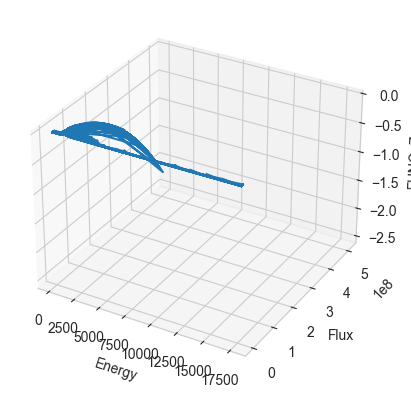

In [12]:
sb.set_style("whitegrid")

def FUNC_Z(x, y):
    return 50 - (x ** 2 + y ** 2)

# Use the 2D arrays directly
Z1 = FUNC_Z(energy, flux)

axes = plt.axes(projection="3d")
axes.plot_wireframe(energy, flux, Z1, rstride=100, cstride=5)
axes.set_xlabel("Energy")
axes.set_ylabel("Flux")
axes.set_zlabel("FUNC_Z")
plt.show()

In [ ]:
seaborn.set_style("darkgrid")

mean = 3
number = 50

x1 = np.random.normal(mean, 1, size=number)
y1 = np.random.normal(mean, 1, size=number)
z1 = np.random.normal(mean, 1, size=number)

plt.figure(figsize=(6, 5))
axes = plt.axes(projection="3d")
print(type(axes))
axes.scatter3D(x1, y1, z1)

axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_zlabel("z")
plt.show()

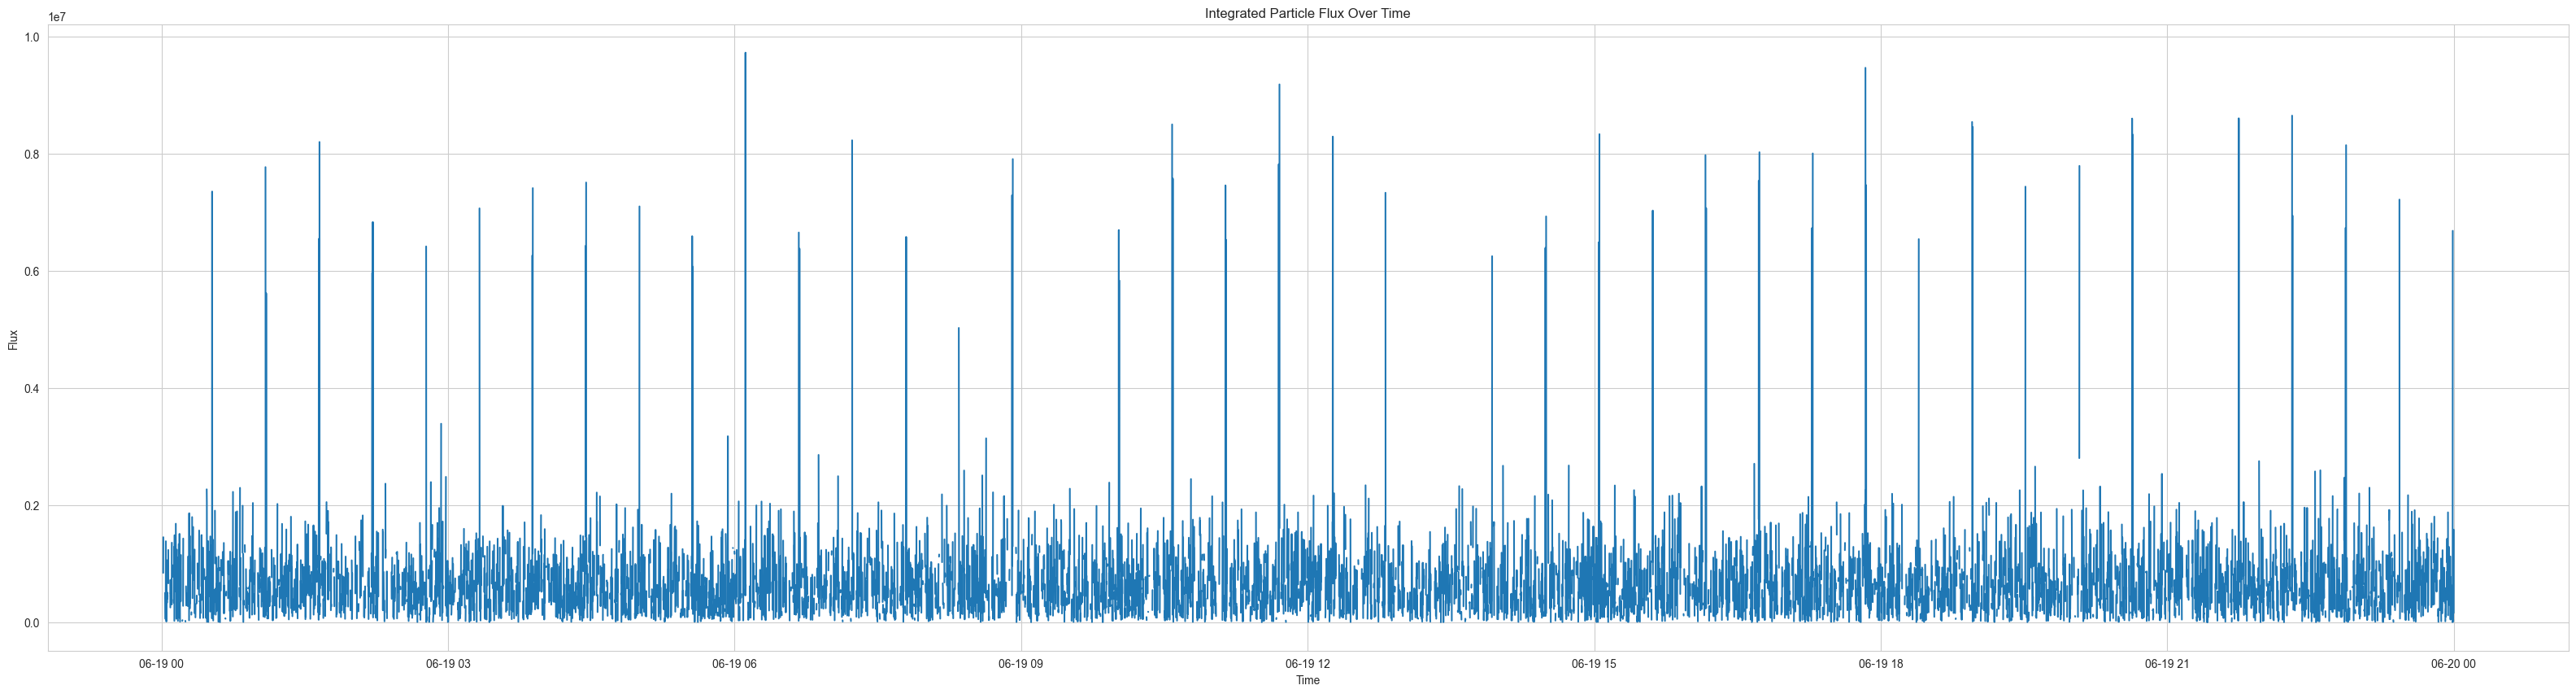

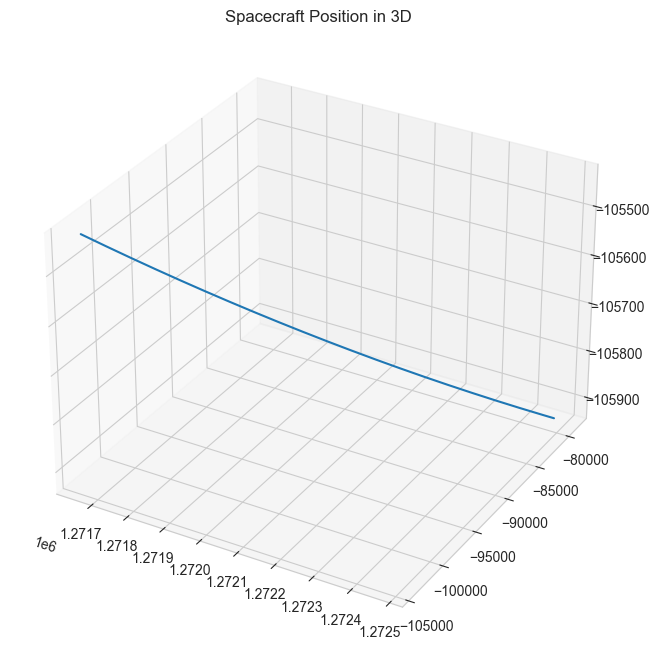

In [13]:
import matplotlib.pyplot as plt

# Plot Flux vs Time
plt.figure(figsize=(40, 10))
plt.plot(df['epoch'], df['flux'])
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("Integrated Particle Flux Over Time")
plt.show()

# Optional 3D plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df['x'], df['y'], df['z'])
ax.set_title("Spacecraft Position in 3D")
plt.show()


In [ ]:
# Simple threshold detection
threshold = 1e4  # customize based on background level
df['Event'] = df['flux'] > threshold

# Mark where event is True
events = df[df['Event']]
print("Detected CME Events:", events[['Time', 'Integrated Flux']])


In [ ]:
df_vars = pd.DataFrame(cdf_file.cdf_info().zVariablesz)
df_vars.head()

,Variable Name
0,epoch_for_cdf_mod
1,energy_center_mod
2,energy_uncer
3,integrated_flux_mod
4,flux_uncer


In [1]:
from cdflib import CDF
import pandas as pd
import matplotlib.pyplot as plt

# Load the file
cdf_file = CDF('AL1_ASW91_L2_TH2_20250619_UNP_9999_999999_V02.cdf')

# List available variables
print("Available Variables:")
print(cdf_file.cdf_info().zVariables)  # Only zVariables since rVariables are empty


Available Variables:
['epoch_for_cdf_mod', 'energy_center_mod', 'energy_uncer', 'integrated_flux_mod', 'flux_uncer', 'integrated_flux_s15_mod', 'integrated_flux_s16_mod', 'integrated_flux_s17_mod', 'integrated_flux_s18_mod', 'integrated_flux_s19_mod', 'spacecraft_xpos', 'spacecraft_ypos', 'spacecraft_zpos', 'sun_angle_tha2']


In [4]:
zvars = cdf_file.cdf_info().zVariables
cdf_dict = {}
for var in zvars:
	arr = cdf_file.varget(var)
	if hasattr(arr, 'ndim') and arr.ndim > 1:
		# Flatten higher-dimensional arrays into separate columns
		if arr.ndim == 2:
			for i in range(arr.shape[1]):
				cdf_dict[f"{var}_{i}"] = arr[:, i]
		elif arr.ndim == 3:
			# For 3D arrays, flatten the last two dimensions
			for i in range(arr.shape[1]):
				for j in range(arr.shape[2]):
					cdf_dict[f"{var}_{i}_{j}"] = arr[:, i, j]
	else:
		cdf_dict[var] = arr
cdf_data = pd.DataFrame(cdf_dict)

In [11]:
cdf_data.isnull().sum()  # Check for missing values

epoch_for_cdf_mod      0
energy_center_mod_0    0
energy_center_mod_1    0
energy_center_mod_2    0
energy_center_mod_3    0
                      ..
sun_angle_tha2_30_1    0
sun_angle_tha2_30_2    0
sun_angle_tha2_31_0    0
sun_angle_tha2_31_1    0
sun_angle_tha2_31_2    0
Length: 452, dtype: int64

In [10]:
cdf_data.columns

Index(['epoch_for_cdf_mod', 'energy_center_mod_0', 'energy_center_mod_1',
       'energy_center_mod_2', 'energy_center_mod_3', 'energy_center_mod_4',
       'energy_center_mod_5', 'energy_center_mod_6', 'energy_center_mod_7',
       'energy_center_mod_8',
       ...
       'sun_angle_tha2_28_2', 'sun_angle_tha2_29_0', 'sun_angle_tha2_29_1',
       'sun_angle_tha2_29_2', 'sun_angle_tha2_30_0', 'sun_angle_tha2_30_1',
       'sun_angle_tha2_30_2', 'sun_angle_tha2_31_0', 'sun_angle_tha2_31_1',
       'sun_angle_tha2_31_2'],
      dtype='object', length=452)

In [5]:
cdf_data

,epoch_for_cdf_mod,energy_center_mod_0,energy_center_mod_1,energy_center_mod_2,energy_center_mod_3,energy_center_mod_4,energy_center_mod_5,energy_center_mod_6,energy_center_mod_7,energy_center_mod_8,...,sun_angle_tha2_28_2,sun_angle_tha2_29_0,sun_angle_tha2_29_1,sun_angle_tha2_29_2,sun_angle_tha2_30_0,sun_angle_tha2_30_1,sun_angle_tha2_30_2,sun_angle_tha2_31_0,sun_angle_tha2_31_1,sun_angle_tha2_31_2
0,6.391751e+13,172.501303,183.244502,193.9877,215.474097,226.217296,236.960494,258.446891,279.933288,301.419685,...,0.379872,-0.980187,-0.001542,0.981372,-0.385491,0.709254,0.001771,-0.000426,-0.553038,0.192107
1,6.391751e+13,172.501303,183.244502,193.9877,215.474097,226.217296,236.960494,258.446891,279.933288,301.419685,...,0.379873,-0.980188,-0.001544,0.981372,-0.385490,0.709253,0.001774,-0.000427,-0.553039,0.192108
2,6.391751e+13,172.501303,183.244502,193.9877,215.474097,226.217296,236.960494,258.446891,279.933288,301.419685,...,0.379876,-0.980188,-0.001542,0.981372,-0.385487,0.709251,0.001773,-0.000428,-0.553041,0.192111
3,6.391751e+13,172.501303,183.244502,193.9877,215.474097,226.217296,236.960494,258.446891,279.933288,301.419685,...,0.379879,-0.980189,-0.001540,0.981371,-0.385484,0.709249,0.001772,-0.000429,-0.553044,0.192114
4,6.391751e+13,172.501303,183.244502,193.9877,215.474097,226.217296,236.960494,258.446891,279.933288,301.419685,...,0.379882,-0.980190,-0.001539,0.981370,-0.385481,0.709246,0.001771,-0.000429,-0.553047,0.192118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17269,6.391760e+13,172.501303,183.244502,193.9877,215.474097,226.217296,236.960494,258.446891,279.933288,301.419685,...,0.379879,-0.980189,-0.001311,0.981371,-0.385485,0.709249,0.001621,-0.000490,-0.553044,0.192114
17270,6.391760e+13,172.501303,183.244502,193.9877,215.474097,226.217296,236.960494,258.446891,279.933288,301.419685,...,0.379878,-0.980189,-0.001315,0.981371,-0.385485,0.709249,0.001625,-0.000491,-0.553044,0.192114
17271,6.391760e+13,172.501303,183.244502,193.9877,215.474097,226.217296,236.960494,258.446891,279.933288,301.419685,...,0.379878,-0.980189,-0.001314,0.981371,-0.385485,0.709249,0.001625,-0.000492,-0.553043,0.192113
17272,6.391760e+13,172.501303,183.244502,193.9877,215.474097,226.217296,236.960494,258.446891,279.933288,301.419685,...,0.379878,-0.980189,-0.001313,0.981371,-0.385485,0.709249,0.001625,-0.000493,-0.553043,0.192113


In [4]:
df

,epoch,energy,flux,x,y,z
0,2025-06-19 00:00:30.661,172.501303,1.064583e+06,1.271661e+06,-104038.863589,-105425.306541
1,2025-06-19 00:00:35.661,172.501303,NaN,1.271661e+06,-104037.415942,-105425.341151
2,2025-06-19 00:00:40.662,172.501303,6.395833e+05,1.271661e+06,-104035.968264,-105425.375762
3,2025-06-19 00:00:45.661,172.501303,NaN,1.271661e+06,-104034.520672,-105425.410370
4,2025-06-19 00:00:50.662,172.501303,5.302083e+05,1.271661e+06,-104033.073021,-105425.444978
...,...,...,...,...,...,...
17269,2025-06-19 23:59:36.452,172.501303,4.270833e+04,1.272474e+06,-78855.236211,-105934.506126
17270,2025-06-19 23:59:41.452,172.501303,NaN,1.272474e+06,-78853.767586,-105934.530524
17271,2025-06-19 23:59:46.452,172.501303,NaN,1.272474e+06,-78852.299018,-105934.554921
17272,2025-06-19 23:59:51.452,172.501303,1.583333e+05,1.272474e+06,-78850.830449,-105934.579317


In [5]:
df.isnull().sum()

epoch        0
energy       0
flux      8738
x            0
y            0
z            0
dtype: int64

In [31]:

import spacepy.pycdf as pycdf

In [32]:
# load the CDF file using spacepy
cdf_file = pycdf.CDF('AL1_ASW91_L2_TH2_20250619_UNP_9999_999999_V02.cdf')
cdf_file

<CDF:
energy_center_mod: CDF_DOUBLE [17274, 50]
energy_uncer: CDF_DOUBLE [] NRV
epoch_for_cdf_mod: CDF_EPOCH [17274]
flux_uncer: CDF_DOUBLE [] NRV
integrated_flux_mod: CDF_DOUBLE [17274, 50]
integrated_flux_s15_mod: CDF_DOUBLE [17274, 50]
integrated_flux_s16_mod: CDF_DOUBLE [17274, 50]
integrated_flux_s17_mod: CDF_DOUBLE [17274, 50]
integrated_flux_s18_mod: CDF_DOUBLE [17274, 50]
integrated_flux_s19_mod: CDF_DOUBLE [17274, 50]
spacecraft_xpos: CDF_DOUBLE [17274]
spacecraft_ypos: CDF_DOUBLE [17274]
spacecraft_zpos: CDF_DOUBLE [17274]
sun_angle_tha2: CDF_DOUBLE [17274, 32, 3]
>

In [43]:
cdf_file.attrs

<gAttrList:
DOI: https://doi.org/10.21203/rs.3.rs-5180284/v1 [CDF_CHAR]
Data_quality: 10, Good quality data, please refer to the data quality definitions in the SWIS-ASPEX data manual [CDF_CHAR]
Data_type: L2>Level-2 Flux spectrum data products [CDF_CHAR]
Data_version: 02 [CDF_CHAR]
Descriptor: SWIS-ASPEX>Solar Wind Ion Spectrometer - Aditya Solar Wind Particle Experiment [CDF_CHAR]
Discipline: Space Physics>Interplanetary particle study [CDF_CHAR]
Generated_by: ASPEX POC, PRL [CDF_CHAR]
Generation_date: 2025-06-21 12:26:51 [CDF_CHAR]
HTTP_LINK: https://pradan.issdc.gov.in/al1/ [CDF_CHAR]
Instrument_type: Particles (space) [CDF_CHAR]
LINK_TEXT: ASPEX/SWIS Data files are available for public download from Indian Space Science Data Center, ISSDC (https://pradan.issdc.gov.in/al1/). [CDF_CHAR]
LINK_TITLE: ISSDC-ISRO [CDF_CHAR]
Logical_file_id: AL1_ASW91_L2_TH2_20250619_UNP_9999_999999_V02.cdf [CDF_CHAR]
Logical_source: AL1_L2_TH2_ASW [CDF_CHAR]
Logical_source_description: Aditya-L1 ASPEX-S

In [48]:
list(cdf_file.keys())

['epoch_for_cdf_mod',
 'energy_center_mod',
 'energy_uncer',
 'integrated_flux_mod',
 'flux_uncer',
 'integrated_flux_s15_mod',
 'integrated_flux_s16_mod',
 'integrated_flux_s17_mod',
 'integrated_flux_s18_mod',
 'integrated_flux_s19_mod',
 'spacecraft_xpos',
 'spacecraft_ypos',
 'spacecraft_zpos',
 'sun_angle_tha2']

* `energy_center_mod` nothing but the kinetic energy measured by `KeV` and `MeV`

In [58]:
import numpy as np

# Get the length of the main time/energy arrays
n = len(cdf_file['epoch_for_cdf_mod'])

# If energy_uncer is a scalar, broadcast it to the correct length as a numpy array
energy_uncer = cdf_file['energy_uncer']
if not hasattr(energy_uncer, '__len__'):
    energy_uncer = np.full(n, energy_uncer)
else:
    energy_uncer = np.asarray(energy_uncer)
    if energy_uncer.shape == ():  # still scalar
        energy_uncer = np.full(n, energy_uncer)
    elif energy_uncer.shape[0] != n:
        # If it's not the right length, broadcast or slice as needed
        energy_uncer = np.resize(energy_uncer, n)

data_pd = pd.DataFrame({
    'time': cdf_file['epoch_for_cdf_mod'],
    'energy': cdf_file['energy_center_mod'][:, 0],  # Use the first column
    # energy_uncer means the uncertainty in energy for the first energy channel
    'energy_uncer': energy_uncer,
    'flux': cdf_file['integrated_flux_mod'][:, 0],  # Use the first column
    'flux_s15': cdf_file['integrated_flux_s15_mod'][:, 0],  # Use the first column
    'flux_s16': cdf_file['integrated_flux_s16_mod'][:, 0],  # Use the first column
    'x': cdf_file['spacecraft_xpos'],
    'y': cdf_file['spacecraft_ypos'],
    'z': cdf_file['spacecraft_zpos']
})
data_pd.head()

,time,energy,energy_uncer,flux,flux_s15,flux_s16,x,y,z
0,2025-06-19 00:00:30.661,172.501303,0.0,1.064583e+06,NaN,6.666667e+05,1.271661e+06,-104038.863589,-105425.306541
1,2025-06-19 00:00:35.661,172.501303,0.0,NaN,NaN,NaN,1.271661e+06,-104037.415942,-105425.341151
2,2025-06-19 00:00:40.662,172.501303,0.0,6.395833e+05,NaN,2.800000e+06,1.271661e+06,-104035.968264,-105425.375762
3,2025-06-19 00:00:45.661,172.501303,0.0,NaN,6.333333e+06,NaN,1.271661e+06,-104034.520672,-105425.410370
4,2025-06-19 00:00:50.662,172.501303,0.0,5.302083e+05,NaN,9.666667e+05,1.271661e+06,-104033.073021,-105425.444978


In [59]:
data_pd['energy_uncer'].unique()

array([0.])

In [52]:
data_pd.isnull().sum()  # Check for missing values

time           0
energy         0
flux        8738
flux_s15    9068
flux_s16    8929
x              0
y              0
z              0
dtype: int64

In [60]:
qe = 1.602e-19       # elementary charge, J/eV
mp = 1.6726e-27      # proton mass, kg
me = 9.1094e-31      # electron mass, kg

# pick your particle: uncomment the one you need
m = mp              # for protons
# m = me           # for electrons

# convert keV -> J
E_joules = data_pd['energy'] * 1e3 * qe

# compute speed (m/s)
df['velocity'] = np.sqrt(2 * E_joules / m)

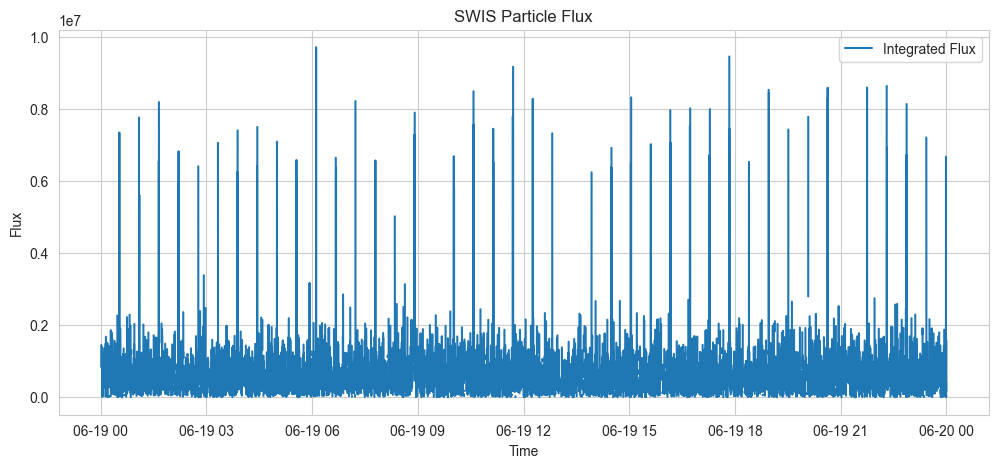

In [61]:
plt.figure(figsize=(12, 5))
plt.plot(data_pd['time'], data_pd['flux'], label='Integrated Flux')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('SWIS Particle Flux')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Automatic onset detection using a threshold
threshold = np.mean(data_pd['flux']) + 3 * np.std(data_pd['flux'])
onset = data_pd[data_pd['flux'] > threshold].iloc[0]  # first point above threshold

arrival_time = onset['time']
print("Detected particle onset at:", arrival_time)


Detected particle onset at: 2025-06-19 00:31:50.678000


In [66]:
from datetime import datetime

# CME launch time from CACTus (example)
cme_launch_time = datetime.strptime("2024-03-05 08:00:00", "%Y-%m-%d %H:%M:%S")


In [67]:
# Travel time in seconds
travel_time = (arrival_time - cme_launch_time).total_seconds()

# Distance from Sun to Aditya-L1 (in km)
distance_km = 1.5e6

# CME average speed in km/s
cme_speed = distance_km / travel_time

print(f"\nEstimated CME speed: {cme_speed:.2f} km/s")



Estimated CME speed: 0.04 km/s


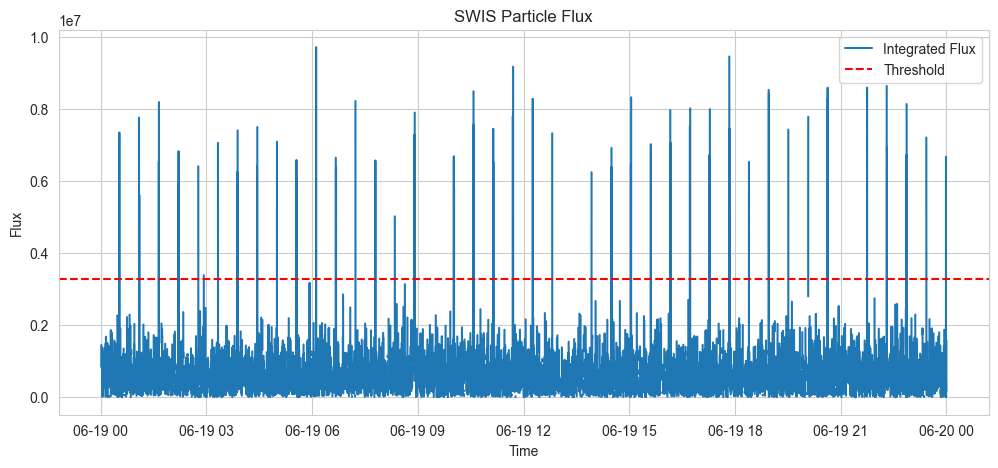

In [69]:
plt.figure(figsize=(12, 5))
plt.plot(data_pd['time'], data_pd['flux'], label='Integrated Flux')
plt.axhline(np.mean(data_pd['flux']) + 3*np.std(data_pd['flux']), color='red', linestyle='--', label='Threshold')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('SWIS Particle Flux')
plt.legend()
plt.grid(True)
plt.show()


In [70]:
data_pd[data_pd['flux'] > threshold].head(10)


,time,energy,energy_uncer,flux,flux_s15,flux_s16,x,y,z
376,2025-06-19 00:31:50.678,172.501303,0.0,7.354167e+06,1.666667e+06,9.933333e+06,1.271678e+06,-103494.463975,-105438.277791
381,2025-06-19 00:32:15.678,172.501303,0.0,7.800000e+06,3.200000e+06,1.280000e+07,1.271678e+06,-103487.223405,-105438.449712
778,2025-06-19 01:05:20.695,172.501303,0.0,7.770833e+06,6.133333e+06,1.226667e+07,1.271697e+06,-102912.219749,-105452.052599
783,2025-06-19 01:05:45.696,172.501303,0.0,5.616667e+06,2.933333e+06,1.033333e+07,1.271697e+06,-102904.976639,-105452.223319
1180,2025-06-19 01:38:50.713,172.501303,0.0,6.545833e+06,1.466667e+06,7.400000e+06,1.271715e+06,-102329.769294,-105465.730940
1185,2025-06-19 01:39:15.713,172.501303,0.0,8.200000e+06,1.733333e+06,1.020000e+07,1.271715e+06,-102322.523593,-105465.900462
1582,2025-06-19 02:12:20.730,172.501303,0.0,5.962500e+06,5.000000e+06,5.000000e+06,1.271733e+06,-101747.113025,-105479.312862
1587,2025-06-19 02:12:45.730,172.501303,0.0,6.833333e+06,6.266667e+06,6.266667e+06,1.271733e+06,-101739.864797,-105479.481184
1984,2025-06-19 02:45:50.748,172.501303,0.0,7.462500e+06,4.866667e+06,9.666667e+06,1.271752e+06,-101164.251478,-105492.798406
1989,2025-06-19 02:46:15.748,172.501303,0.0,6.416667e+06,5.933333e+06,7.466667e+06,1.271752e+06,-101157.000670,-105492.965530


In [71]:
print("CME Launch Time:", cme_launch_time)
print("Particle Arrival Time:", arrival_time)
print("Travel Time (hours):", travel_time / 3600)


CME Launch Time: 2024-03-05 08:00:00
Particle Arrival Time: 2025-06-19 00:31:50.678000
Travel Time (hours): 11296.53074388889


In [72]:
cme_launch_time = datetime.strptime("2024-03-04 00:00:00", "%Y-%m-%d %H:%M:%S")


In [73]:
def compute_cme_speed(launch, arrival, dist_km=1.5e6):
    travel_sec = (arrival - launch).total_seconds()
    if travel_sec <= 0:
        return "Invalid: Arrival before launch"
    speed = dist_km / travel_sec
    return f"CME Speed: {speed:.2f} km/s (Travel time: {travel_sec/3600:.2f} hours)"


In [74]:
compute_cme_speed(cme_launch_time, arrival_time)

'CME Speed: 0.04 km/s (Travel time: 11328.53 hours)'